In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
path = "/content/drive/MyDrive/Data weather.zip"
files = os.listdir(path)
print(files)

['test', 'train', 'Testing_set.csv', 'Training_set.csv']


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/weather.zip/Training_set.csv")
df.head()

,filename,label
0,Image_1.jpg,sunrise
1,Image_2.jpg,shine
2,Image_3.jpg,cloudy
3,Image_4.jpg,shine
4,Image_5.jpg,sunrise


In [ ]:
df.label.value_counts()

sunrise    245
cloudy     210
foggy      210
rainy      209
shine      174
Name: label, dtype: int64

In [ ]:
df.isnull().sum()

filename    0
label       0
dtype: int64

In [ ]:
df.shape

(1048, 2)

In [ ]:
classes = {'sunrise':0, 'foggy':1, 'cloudy':2, 'rainy':3, 'shine':4}

In [ ]:
import cv2
dim1 = []
dim2 = []
for i in range(len(df)):
  img = cv2.imread(path+"/train/"+df.iloc[i, 0], 0)
  dim1.append(img.shape[0])
  dim2.append(img.shape[1])

In [ ]:

print(min(dim1))
print(min(dim2))

110
168


In [ ]:

x = []
y = []
for i in range(len(df)):
  img = cv2.resize(cv2.imread(path+"/train/"+df.iloc[i, 0], 0), (110, 110))
  x.append(img)
  y.append(classes[df.iloc[i, 1]])

In [ ]:
pd.Series(y).value_counts()

0    245
2    210
1    210
3    209
4    174
dtype: int64

In [ ]:
x[0].shape

(110, 110)

In [ ]:
import numpy as np
print(type(x))
x = np.array(x)
y = np.array(y)
print(type(x))

<class 'list'>
<class 'numpy.ndarray'>


4


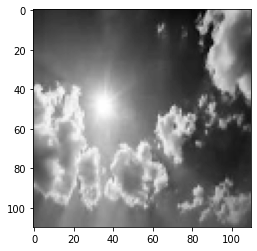

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x[3], cmap="gray")
print(y[3])

In [ ]:
x_new = x.reshape(len(x), -1)
print(x_new.shape)
print(y.shape)

(1048, 12100)
(1048,)


In [ ]:
print(x.shape)
print(x.ndim)
print(x_new.ndim)

(1048, 110, 110)
3
2


In [ ]:
print(x_new.max())

255


In [ ]:
x_train = x_new/255
print(x_train.max())

1.0


In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# import matplotlib.pyplot as plt
# import numpy as np

# model = keras.Sequential([
#  keras.layers.Dense(10000, input_shape=(12100,), activation='relu'),
#  keras.layers.Dense(5, activation='sigmoid')
# ])


# model.compile(
#  optimizer='SGD',
#  loss='sparse_categorical_crossentropy',
#  metrics=['accuracy']
# )

# model.fit(x_train, y, epochs=10)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

model = keras.Sequential([
 keras.layers.Dense(3000, input_shape=(12100,), activation='relu'),
#  keras.layers.Dense(801, activation='relu'),
 keras.layers.Dense(1111, activation='relu'),
#  keras.layers.Dense(601, activation='relu'),
 keras.layers.Dense(869, activation='relu'),
#  keras.layers.Dense(401, activation='relu'),
 keras.layers.Dense(534, activation='relu'),
#  keras.layers.Dense(201, activation='relu'),
 keras.layers.Dense(296, activation='relu'),
 keras.layers.Dense(5, activation='sigmoid')
])


model.compile(
 optimizer='Adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
)

model.fit(x_train, y, epochs=30)

Epoch 1/30
33/33 [==============================] - 9s 247ms/step - loss: 4.7329 - accuracy: 0.2118
Epoch 2/30
33/33 [==============================] - 8s 247ms/step - loss: 1.4756 - accuracy: 0.3397
Epoch 3/30
33/33 [==============================] - 8s 248ms/step - loss: 1.3708 - accuracy: 0.4303
Epoch 4/30
33/33 [==============================] - 8s 247ms/step - loss: 1.3363 - accuracy: 0.4494
Epoch 5/30
33/33 [==============================] - 8s 247ms/step - loss: 1.2879 - accuracy: 0.4761
Epoch 6/30
33/33 [==============================] - 8s 248ms/step - loss: 1.2359 - accuracy: 0.4847
Epoch 7/30
33/33 [==============================] - 8s 248ms/step - loss: 1.2325 - accuracy: 0.4933
Epoch 8/30
33/33 [==============================] - 8s 248ms/step - loss: 1.2200 - accuracy: 0.4962
Epoch 9/30
33/33 [==============================] - 8s 248ms/step - loss: 1.2038 - accuracy: 0.5029
Epoch 10/30
33/33 [==============================] - 8s 248ms/step - loss: 1.1799 - accuracy: 0.5334

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Data Sprint/weather/weather (1).zip (Unzipped Files)/Testing_set.csv")
df_test.head()

In [ ]:
df_test.shape

In [ ]:
import cv2
x_test = []
for i in range(len(df_test)):
  img = cv2.resize(cv2.imread(path+"/test/"+df_test.iloc[i, 0], 0), (110, 110))
  x_test.append(img)

In [ ]:
import numpy as np
print(type(x_test))
x_test = np.array(x_test)
print(type(x_test))

<class 'list'>
<class 'numpy.ndarray'>


In [ ]:
x_test_new = x_test.reshape(len(x_test), -1)
print(x_test_new.shape)

(450, 12100)


In [ ]:

print(x_test.shape)
print(x_test.ndim)
print(x_test_new.ndim)

(450, 110, 110)
3
2


In [ ]:

print(x_test_new.max())

255


In [ ]:
new_x_test = x_test_new/255
print(new_x_test.max())

1.0


In [ ]:
y_predicted = model.predict(new_x_test)
y_predicted[0]

array([0.90008986, 0.43976265, 0.7005583 , 0.21837941, 0.12719011],
      dtype=float32)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:15]

[0, 1, 1, 3, 0, 4, 3, 1, 4, 2, 4, 0, 0, 0, 0]

In [ ]:
decode = {0:'sunrise', 1:'foggy', 2:'cloudy', 3:'rainy', 4:'shine'}

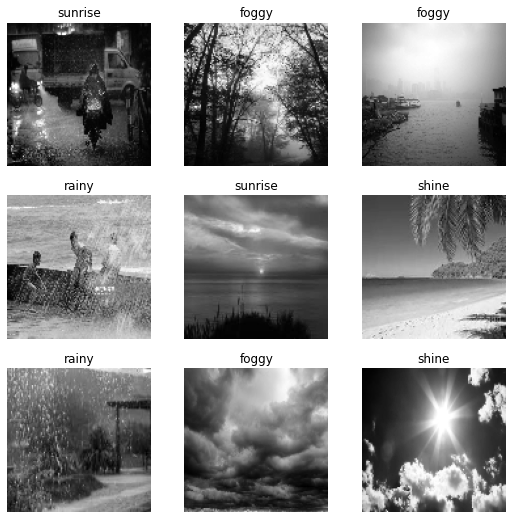

In [ ]:
plt.figure(figsize=(9, 9))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(new_x_test[i].reshape(110, 110), cmap='gray')
  plt.title(decode[y_predicted_labels[i]])
  plt.axis('off')

In [ ]:
result = []
for i in range(len(df_test)):
  result.append(decode[y_predicted_labels[i]])

In [ ]:

df_result = pd.DataFrame({'label': result})
df_result.head()

,label
0,sunrise
1,foggy
2,foggy
3,rainy
4,sunrise


In [ ]:
res = pd.DataFrame(result)
res.columns = ["label"]

from google.colab import files
res.to_csv('prediction_results_final_2.csv')         
files.download('prediction_results_final_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>